#Smart weather monitoring system



*   Muhammad bin Usman 368356
*   Muhammad Salman Ahmed 394765
*   Muhammad Umer Bashir 365847







#Acquire Dataset -World Weather Repository ( Daily Updating from kaggle)

In [1]:
# kaggle api
!mkdir -p /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/

In [3]:
# download data from kaggle
!kaggle datasets download -d nelgiriyewithana/global-weather-repository

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
  0% 0.00/3.27M [00:00<?, ?B/s]
100% 3.27M/3.27M [00:00<00:00, 133MB/s]


In [4]:
!unzip /content/global-weather-repository.zip

Archive:  /content/global-weather-repository.zip
  inflating: GlobalWeatherRepository.csv  
  inflating: state.db                


In [5]:
# imports
import pandas as pd
import numpy as np

In [6]:
# read csv
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

In [7]:
# first view of data
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42709,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1734862500,2024-12-22 06:15,19.3,66.7,Clear,...,19.055,23.125,2,2,06:41 AM,06:12 PM,No moonrise,12:16 PM,Last Quarter,57
42710,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1734862500,2024-12-22 17:15,21.2,70.1,Sunny,...,118.955,119.325,4,10,06:29 AM,05:21 PM,11:45 PM,11:32 AM,Waning Gibbous,62
42711,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1734862500,2024-12-22 13:15,20.7,69.3,Sunny,...,26.455,63.825,2,3,06:25 AM,05:39 PM,12:00 AM,11:42 AM,Last Quarter,60
42712,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1734860700,2024-12-22 11:45,31.5,88.7,Sunny,...,11.285,11.655,1,1,05:35 AM,06:37 PM,No moonrise,11:42 AM,Last Quarter,60


#Data Insights

In [8]:
# get data columns, types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42714 entries, 0 to 42713
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       42714 non-null  object 
 1   location_name                 42714 non-null  object 
 2   latitude                      42714 non-null  float64
 3   longitude                     42714 non-null  float64
 4   timezone                      42714 non-null  object 
 5   last_updated_epoch            42714 non-null  int64  
 6   last_updated                  42714 non-null  object 
 7   temperature_celsius           42714 non-null  float64
 8   temperature_fahrenheit        42714 non-null  float64
 9   condition_text                42714 non-null  object 
 10  wind_mph                      42714 non-null  float64
 11  wind_kph                      42714 non-null  float64
 12  wind_degree                   42714 non-null  int64  
 13  w

In [9]:
# null values
df.isna().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [10]:
# columns
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [11]:
# get islamabad rows
islamabad = df[df['location_name']=="Islamabad"]

In [12]:
# remove the columns that dont adhere to our project
columns_to_keep = ['last_updated','temperature_celsius', 'condition_text', 'wind_kph', 'precip_mm', 'gust_kph',
                   'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                   'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                   'air_quality_us-epa-index', 'air_quality_gb-defra-index']

In [13]:
islamabad = islamabad[columns_to_keep]
islamabad.shape

(219, 14)

In [14]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
131,2024-05-16 13:45,38.2,Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2
326,2024-05-16 19:00,33.0,Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3
520,2024-05-17 21:00,31.3,Clear,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3
713,2024-05-18 19:30,32.4,Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2
907,2024-05-19 19:15,32.1,Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2024-12-18 15:30,17.7,Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10
42065,2024-12-19 15:30,18.6,Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10
42260,2024-12-20 15:45,19.1,Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10
42455,2024-12-21 15:45,18.0,Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10


In [15]:
islamabad['last_updated'] = pd.to_datetime(islamabad['last_updated'], format='mixed').dt.date

#Formatting Data for ThingsSpeak

<p><strong>ThingSpeak</strong> is an Internet of Things (IoT) platform that enables users to collect, analyze, and visualize data from sensors or devices in real-time. It provides a cloud-based infrastructure for managing and sharing IoT data, making it accessible for monitoring and decision-making applications.</p>


In [16]:
islamabad_thingsspeak = islamabad

In [17]:
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                    'air_quality_us-epa-index', 'air_quality_gb-defra-index']

# Calculate the row-wise average
islamabad_thingsspeak['average_air_quality'] = islamabad_thingsspeak[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_thingsspeak

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2024-05-16,38.2,Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2,65.275000
326,2024-05-16,33.0,Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3,181.537500
520,2024-05-17,31.3,Clear,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3,251.587500
713,2024-05-18,32.4,Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2,153.650000
907,2024-05-19,32.1,Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2,192.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2024-12-18,17.7,Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10,386.841250
42065,2024-12-19,18.6,Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10,235.839375
42260,2024-12-20,19.1,Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10,327.132500
42455,2024-12-21,18.0,Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10,366.856250


In [18]:
islamabad_thingsspeak = islamabad_thingsspeak.drop(['condition_text', 'gust_kph', 'air_quality_Carbon_Monoxide',
                                                    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
                                                    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
                                                    'air_quality_gb-defra-index'], axis=1)
islamabad_thingsspeak

,last_updated,temperature_celsius,wind_kph,precip_mm,average_air_quality
131,2024-05-16,38.2,11.9,0.0,65.275000
326,2024-05-16,33.0,11.5,0.0,181.537500
520,2024-05-17,31.3,11.2,0.0,251.587500
713,2024-05-18,32.4,13.3,0.0,153.650000
907,2024-05-19,32.1,6.5,0.0,192.187500
...,...,...,...,...,...
41870,2024-12-18,17.7,5.4,0.0,386.841250
42065,2024-12-19,18.6,8.6,0.0,235.839375
42260,2024-12-20,19.1,8.6,0.0,327.132500
42455,2024-12-21,18.0,6.8,0.0,366.856250


In [19]:
# export the datafarem to allow Visualziation on ThingsSpeak
islamabad_thingsspeak.to_csv('islamabad.csv', index=False)

#Descriptive Data Analysis

In [20]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2024-05-16,38.2,Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2,65.275000
326,2024-05-16,33.0,Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3,181.537500
520,2024-05-17,31.3,Clear,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3,251.587500
713,2024-05-18,32.4,Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2,153.650000
907,2024-05-19,32.1,Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2,192.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2024-12-18,17.7,Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10,386.841250
42065,2024-12-19,18.6,Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10,235.839375
42260,2024-12-20,19.1,Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10,327.132500
42455,2024-12-21,18.0,Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10,366.856250


In [21]:
# get the classes
islamabad.condition_text.value_counts()

,count
condition_text,
Sunny,178
Patchy rain nearby,17
Partly Cloudy,10
Overcast,5
Light rain shower,3
Cloudy,2
Clear,1
Patchy light rain in area with thunder,1
Patchy light drizzle,1


In [22]:
# merging the classes
weather_mapping = {
    'Clear': 'Clear & Sunny',
    'Sunny': 'Clear & Sunny',
    'Partly cloudy': 'Partly Cloudy & Patchy Clouds',
    'Patchy rain possible': 'Partly Cloudy & Patchy Clouds',
    'Light rain shower': 'Partly Cloudy & Patchy Clouds',
    'Patchy light rain with thunder': 'Partly Cloudy & Patchy Clouds',
    'Cloudy': 'Cloudy & Overcast',
    'Overcast': 'Cloudy & Overcast'
}

# Create a new column 'combined_weather'
islamabad['condition_text'] = islamabad['condition_text'].map(weather_mapping)

# Display the updated DataFrame
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2024-05-16,38.2,Clear & Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2,65.275000
326,2024-05-16,33.0,Clear & Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3,181.537500
520,2024-05-17,31.3,Clear & Sunny,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3,251.587500
713,2024-05-18,32.4,Clear & Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2,153.650000
907,2024-05-19,32.1,Clear & Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2,192.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2024-12-18,17.7,Cloudy & Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10,386.841250
42065,2024-12-19,18.6,Clear & Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10,235.839375
42260,2024-12-20,19.1,Clear & Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10,327.132500
42455,2024-12-21,18.0,Cloudy & Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10,366.856250


In [23]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Set seaborn style for better visualization
sns.set(style="whitegrid")

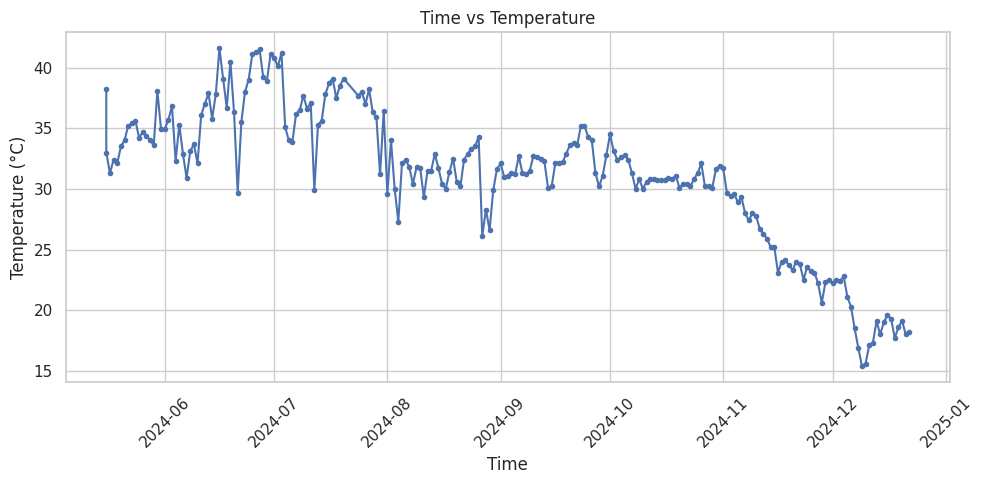

In [25]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(islamabad['last_updated'], islamabad['temperature_celsius'], marker='.', linestyle='-', color='b')
plt.title('Time vs Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

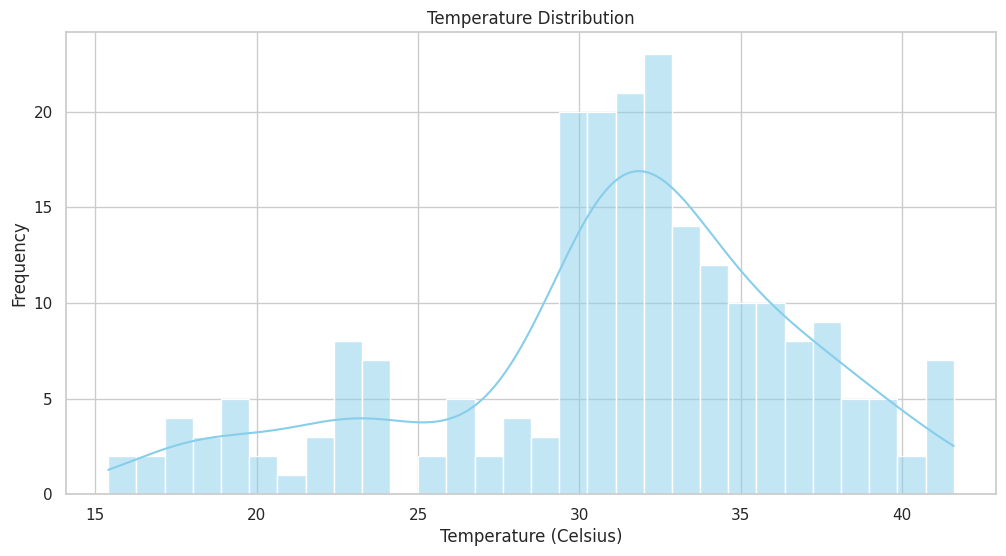

In [26]:
# Temperature Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['temperature_celsius'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

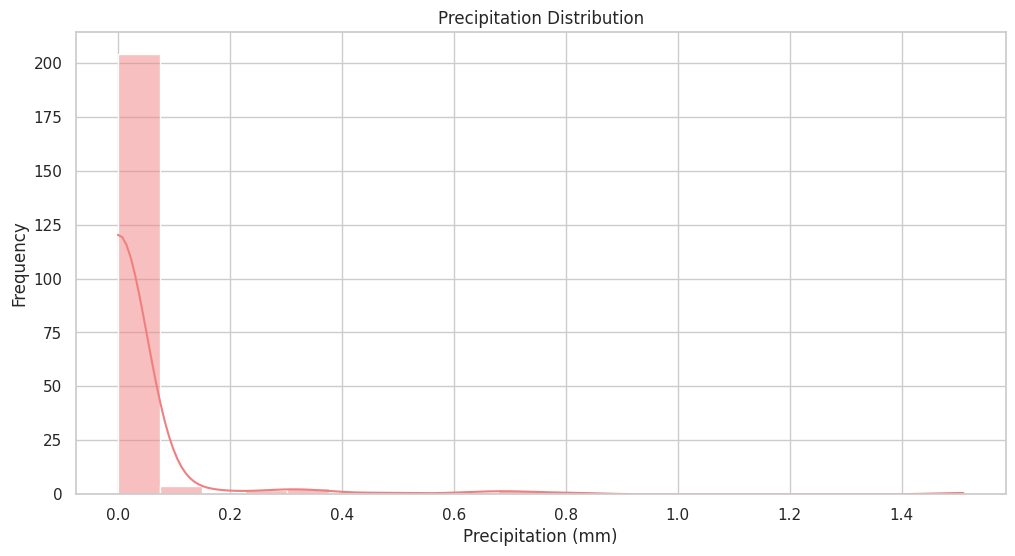

In [27]:
# Precipitation Distribution
plt.figure(figsize=(12, 6))
sns.histplot(islamabad['precip_mm'], bins=20, kde=True, color='lightcoral')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-28-70298dc50887>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition_text', y='wind_kph', data=islamabad, palette='Blues')


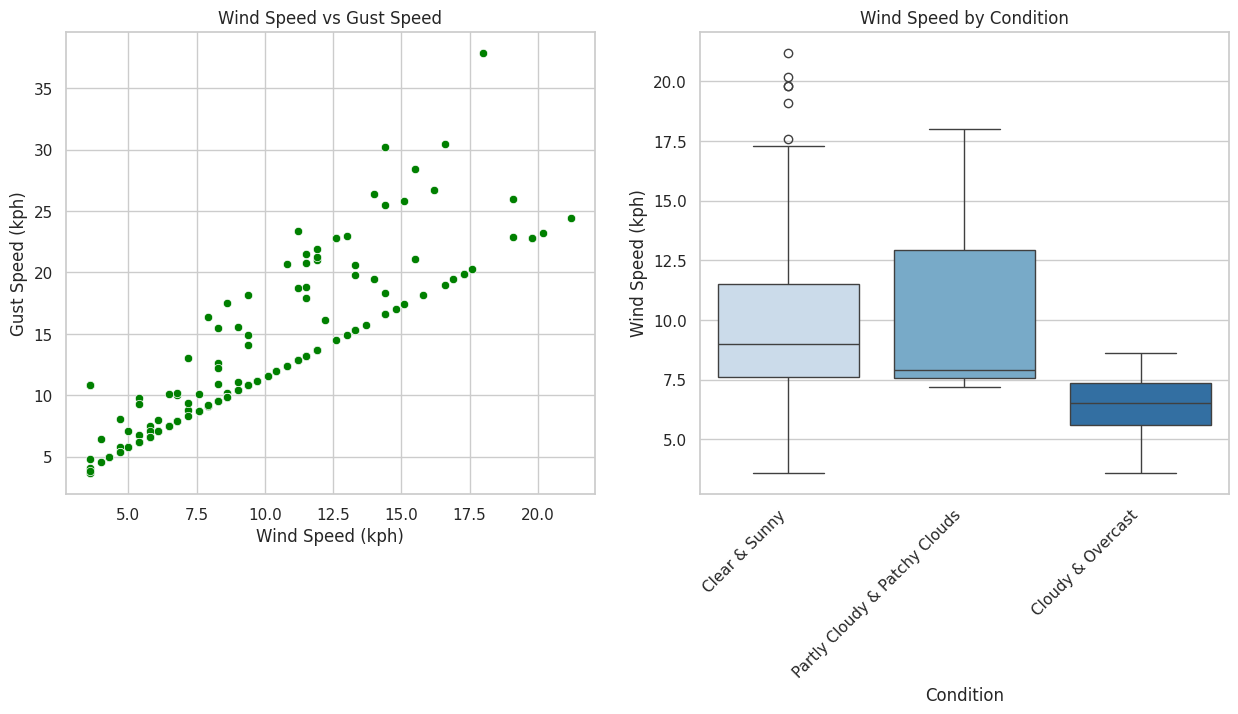

In [28]:
# Wind and Gust Visualization
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='wind_kph', y='gust_kph', data=islamabad, color='green')
plt.title('Wind Speed vs Gust Speed')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Gust Speed (kph)')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='condition_text', y='wind_kph', data=islamabad, palette='Blues')
plt.title('Wind Speed by Condition')
plt.xlabel('Condition')
plt.ylabel('Wind Speed (kph)')

# Set x-label rotation angle
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.show()


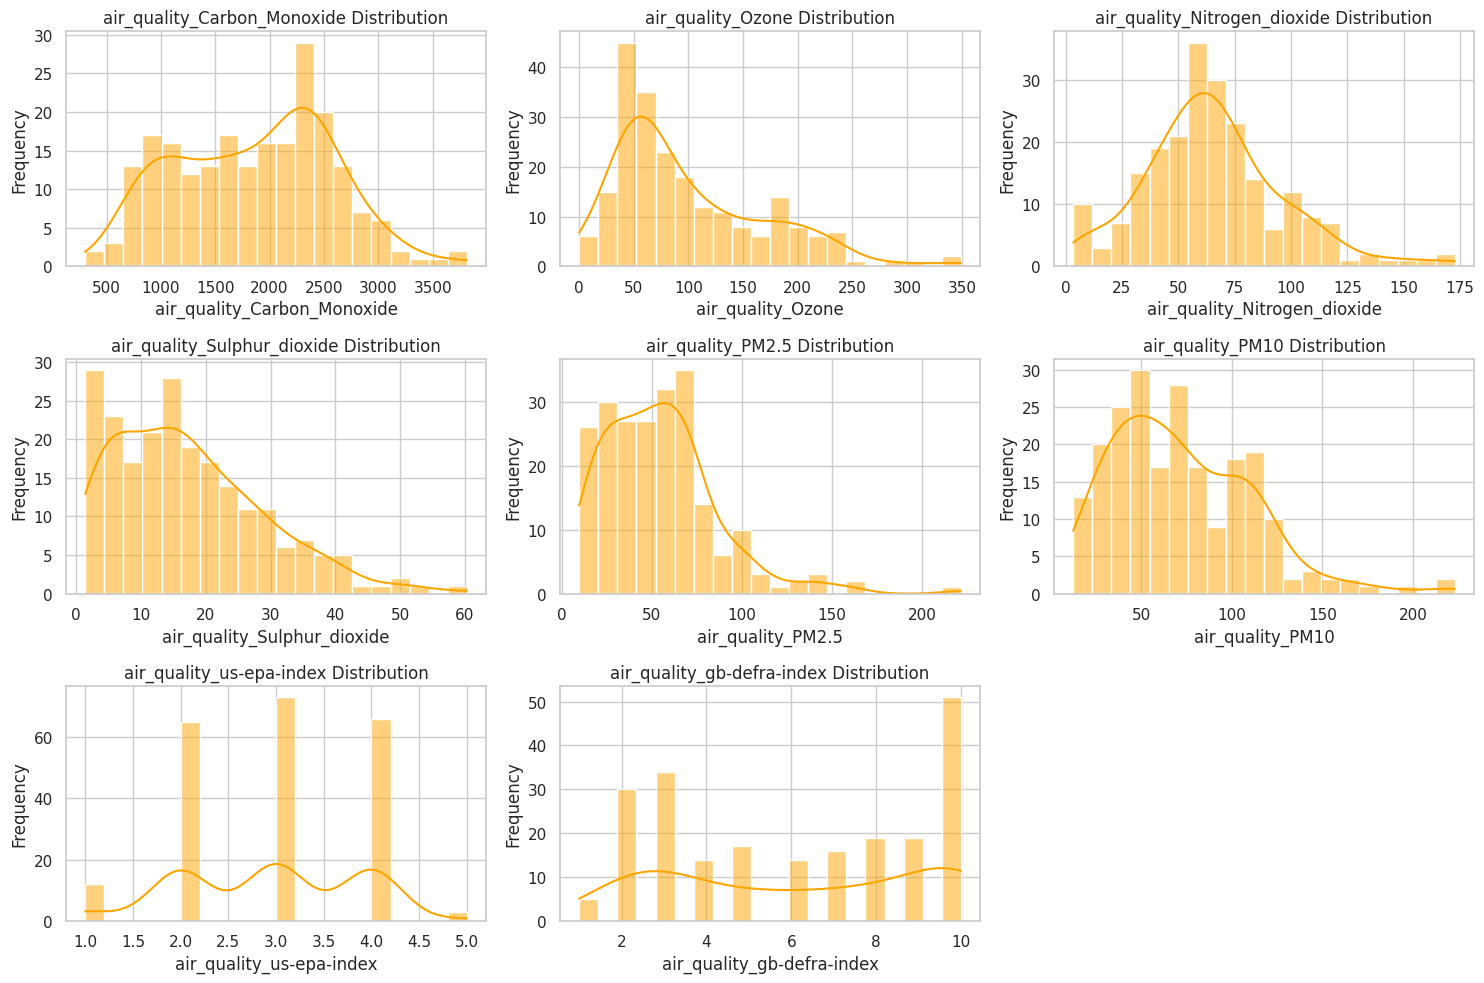

In [29]:
# Air Quality Visualization
plt.figure(figsize=(15, 10))  # Adjust the figure size for better spacing
for i, col in enumerate(air_quality_cols):
    plt.subplot(3, 3, i + 1)  # Use 3x3 grid and start subplot indices from 1
    sns.histplot(islamabad[col], bins=20, kde=True, color='orange')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#Preprocessing for the model

In [30]:
islamabad

,last_updated,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,2024-05-16,38.2,Clear & Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2,65.275000
326,2024-05-16,33.0,Clear & Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3,181.537500
520,2024-05-17,31.3,Clear & Sunny,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3,251.587500
713,2024-05-18,32.4,Clear & Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2,153.650000
907,2024-05-19,32.1,Clear & Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2,192.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2024-12-18,17.7,Cloudy & Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10,386.841250
42065,2024-12-19,18.6,Clear & Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10,235.839375
42260,2024-12-20,19.1,Clear & Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10,327.132500
42455,2024-12-21,18.0,Cloudy & Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10,366.856250


In [31]:
islamabad_model = islamabad.drop(["last_updated"],axis=1)

In [32]:
# averaging air quality
islamabad_model['average_air_quality'] = islamabad_model[air_quality_cols].mean(axis=1, skipna=True)

# Display the DataFrame with the new column
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,average_air_quality
131,38.2,Clear & Sunny,11.9,0.0,13.7,303.80,163.1,3.400,1.400,15.500,31.000,2,2,65.275000
326,33.0,Clear & Sunny,11.5,0.0,21.5,1255.00,47.2,67.900,4.300,26.900,46.000,2,3,181.537500
520,31.3,Clear & Sunny,11.2,0.0,23.4,1815.80,0.9,94.600,4.500,29.600,62.300,2,3,251.587500
713,32.4,Clear & Sunny,13.3,0.0,20.6,1081.50,39.7,58.300,3.000,15.200,28.500,1,2,153.650000
907,32.1,Clear & Sunny,6.5,0.0,10.1,1335.10,70.1,67.900,4.000,20.800,35.600,2,2,192.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,17.7,Cloudy & Overcast,5.4,0.0,6.2,2704.70,36.0,121.175,22.940,97.125,98.790,4,10,386.841250
42065,18.6,Clear & Sunny,8.6,0.0,9.9,1500.35,71.0,69.930,32.005,98.050,101.380,4,10,235.839375
42260,19.1,Clear & Sunny,8.6,0.0,9.9,2218.15,73.0,70.115,37.925,100.640,103.230,4,10,327.132500
42455,18.0,Cloudy & Overcast,6.8,0.0,7.9,2473.45,70.0,82.880,28.305,131.350,134.865,4,10,366.856250


In [33]:
islamabad_model = islamabad_model.drop(air_quality_cols, axis=1)

In [34]:
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,gust_kph,average_air_quality
131,38.2,Clear & Sunny,11.9,0.0,13.7,65.275000
326,33.0,Clear & Sunny,11.5,0.0,21.5,181.537500
520,31.3,Clear & Sunny,11.2,0.0,23.4,251.587500
713,32.4,Clear & Sunny,13.3,0.0,20.6,153.650000
907,32.1,Clear & Sunny,6.5,0.0,10.1,192.187500
...,...,...,...,...,...,...
41870,17.7,Cloudy & Overcast,5.4,0.0,6.2,386.841250
42065,18.6,Clear & Sunny,8.6,0.0,9.9,235.839375
42260,19.1,Clear & Sunny,8.6,0.0,9.9,327.132500
42455,18.0,Cloudy & Overcast,6.8,0.0,7.9,366.856250


In [35]:
islamabad_model = islamabad_model.drop(['gust_kph'], axis=1)

In [36]:
islamabad_model.describe()

,temperature_celsius,wind_kph,precip_mm,average_air_quality
count,219.000000,219.000000,219.000000,219.000000
mean,31.041553,9.333333,0.032420,272.372503
std,5.798834,3.748606,0.149529,96.083382
min,15.400000,3.600000,0.000000,65.275000
25%,29.600000,6.800000,0.000000,186.112500
50%,31.700000,8.600000,0.000000,285.976250
75%,34.800000,11.500000,0.000000,341.231562
max,41.600000,21.200000,1.510000,524.312500


In [37]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df and you want to normalize specific columns
columns_to_normalize = ['temperature_celsius', 'wind_kph', 'average_air_quality']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
islamabad_model[columns_to_normalize] = scaler.fit_transform(islamabad_model[columns_to_normalize])

# Display the updated DataFrame
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,1.237291,Clear & Sunny,0.686268,0.0,-2.160331
326,0.338505,Clear & Sunny,0.579317,0.0,-0.947543
520,0.044671,Clear & Sunny,0.499104,0.0,-0.216818
713,0.234799,Clear & Sunny,1.060595,0.0,-1.238450
907,0.182946,Clear & Sunny,-0.757568,0.0,-0.836447
...,...,...,...,...,...
41870,-2.306001,Cloudy & Overcast,-1.051683,0.0,1.194077
42065,-2.150442,Clear & Sunny,-0.196076,0.0,-0.381094
42260,-2.064020,Clear & Sunny,-0.196076,0.0,0.571227
42455,-2.254148,Cloudy & Overcast,-0.677355,0.0,0.985604


In [38]:
islamabad_model.condition_text.value_counts()

,count
condition_text,
Clear & Sunny,179
Cloudy & Overcast,7
Partly Cloudy & Patchy Clouds,3


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categories = ['Clear & Sunny', 'Partly Cloudy & Patchy Clouds', 'Cloudy & Overcast']

label_encoder.fit(categories)

# Replace NaN values with a placeholder
islamabad_model['condition_text'] = islamabad_model['condition_text'].fillna('Unknown')

# Include 'Unknown' in the categories
categories = ['Clear & Sunny', 'Partly Cloudy & Patchy Clouds', 'Cloudy & Overcast', 'Unknown']

# Fit the LabelEncoder with updated categories
label_encoder.fit(categories)

# Transform the 'condition_text' column
islamabad_model['condition_text'] = label_encoder.transform(islamabad_model['condition_text'])


In [41]:
# Display the mapping between encoded values and original class labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{'Clear & Sunny': 0, 'Cloudy & Overcast': 1, 'Partly Cloudy & Patchy Clouds': 2, 'Unknown': 3}


In [42]:
islamabad_model

,temperature_celsius,condition_text,wind_kph,precip_mm,average_air_quality
131,1.237291,0,0.686268,0.0,-2.160331
326,0.338505,0,0.579317,0.0,-0.947543
520,0.044671,0,0.499104,0.0,-0.216818
713,0.234799,0,1.060595,0.0,-1.238450
907,0.182946,0,-0.757568,0.0,-0.836447
...,...,...,...,...,...
41870,-2.306001,1,-1.051683,0.0,1.194077
42065,-2.150442,0,-0.196076,0.0,-0.381094
42260,-2.064020,0,-0.196076,0.0,0.571227
42455,-2.254148,1,-0.677355,0.0,0.985604


In [43]:
islamabad_model.condition_text.value_counts()

,count
condition_text,
0,179
3,30
1,7
2,3


#Predictive Analysis

In [44]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [45]:
# Split the data into features (X) and target (y)
X = islamabad_model.drop(columns=['condition_text'])
y = islamabad_model['condition_text']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<dl>
  <dt>'Clear & Sunny; 0'</dt>
  
  <dt>'Cloudy & Overcast: 1'</dt>
  
  <dt>'Partly Cloudy & Patchy Clouds: 2'</dt>
</dl>


In [46]:
dst = DecisionTreeClassifier()

dst.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dst.predict(X_test)

# Display the classification report
print(f"Classification Report for Decision Tree Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50         6

    accuracy                           0.80        44
   macro avg       0.42      0.59      0.45        44
weighted avg       0.84      0.80      0.81        44

--------------------------------------------------


<p>Considering the classification results, the Decision Tree model exhibits suboptimal recall values, particularly for the 'Partly Cloudy & Patchy Clouds' class. This indicates a need for further improvement in the model's performance on this specific class.</p>


In [47]:
class_weights = {0: 1,
                1: 20,
                2: 10}

rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest Classifier with Class Weights:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier with Class Weights:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.80      0.67      0.73         6

    accuracy                           0.91        44
   macro avg       0.56      0.66      0.59        44
weighted avg       0.89      0.91      0.90        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Display the classification report
print(f"Classification Report for Random Forest Classifier")
print(classification_report(y_test, y_pred))
print("-" * 50)

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.80      0.67      0.73         6

    accuracy                           0.91        44
   macro avg       0.56      0.66      0.59        44
weighted avg       0.89      0.91      0.90        44

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
